In [110]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
from astropy.table import Table

## Trimming tables to ensure 1-to-1 matching of entries.

In [89]:
homedir = os.getenv("HOME")

#fixed --> PA, BA held constant
#free --> all initial parameters allowed to vary

fixed = ascii.read(homedir+'/fixed_output.txt')
free = ascii.read(homedir+'/free_output.txt')

In [91]:
#following VFIDs represent galaxies at which GALFIT failed
failure_list = ['VFID1154-NGC3310','VFID1578-CGCG243-020','VFID2171-NGC4151','VFID2533-UGC08323',
                'VFID2622-NGC5347','VFID2658-UGC06892']


#may have to run multiple times; will remove failure galaxies from both tables
    if free['galname'][i] in failure_list:
        free.remove_row(i)
        print('free',i)

for i in range(0,len(fixed_name)):
    if fixed['galname'][i] in failure_list:
        fixed.remove_row(i)
        print('fixed',i)

fixed 241
fixed 325
fixed 422
fixed 466
fixed 473
fixed 477


In [92]:
#first flag "free" galaxies that appear in the "fixed" table counterpart
free_flag = []
fixed_name = []

for prefix in fixed['galname']:
    name = prefix[0:8]
    fixed_name.append(name)
    
    
for galname in free['galname']:
    prefix = galname[0:8]
    if prefix in fixed_name:
        free_flag.append(True)
    else:
        free_flag.append(False)
        print(galname)

VFID0146-KAZ186
VFID0322-KUG1736+636
VFID0422-ARK499
VFID0626-GALEX2680919432329433855
VFID1120-SBS1245+542
VFID1218-UGCA412
VFID1275-WISEAJ141257.79+510136.2
VFID1334-SBS1410+504
VFID1863-2MASSJ13403041+4259430
VFID1864
VFID2559-WISEAJ142119.51+343154.7
VFID2800-2MASXJ11390132+3129155
VFID3616-WISEAJ161516.13+210536.1
VFID3981-WISEAJ064252.64+170505.9
VFID5013-MRK0706


In [93]:
free = free[free_flag]

fixed.remove_row(325)    #--> index329 not in free['galname']

In [109]:
os.chdir(homedir)
ascii.write(free,'free_paba.fits',overwrite=True)
ascii.write(fixed,'fixed_paba.fits',overwrite=True)

--------

## Plots!

In [129]:
free = Table.read('free_paba.fits',format='ascii')
fixed = Table.read('fixed_paba.fits',format='ascii')

In [135]:
#isolating snr (15, 30 arcsec) columns from table.csv
snr_table = Table.read(homedir+'/vf_snr_table.csv',format='csv')

In [138]:
#trimming table...note, ONLY INCLUDES CENTRAL GALAXIES (since external galaxies do not have SNR entries)!

#matching central galaxies
for i in range(0,len(snr_table)):
    if snr_table['prefix'][i] not in fixed['galname']:
        snr_table.remove_row(i)
        print('fixed',i)

In [143]:
#create re_ratio flag that excludes non-central galaxies
dummycat = Table.read(homedir+'/dummycat.fits',format='ascii')

In [146]:
#updating fixed_name list
fixed_name = []

for prefix in fixed['galname']:
    name = prefix[0:8]
    fixed_name.append(name)

#generating the flag
external_flag = []
for i in range(0,len(free)):
    if fixed_name[i] not in dummycat['ID']:
        external_flag.append(True)
    else:
        external_flag.append(False)

1061

In [468]:
re_ratio = fixed['re']/free['re']

In [469]:
re_ratio = re_ratio[external_flag]

In [329]:
snr15 = snr_table['snr15']
snr30 = snr_table['snr30']

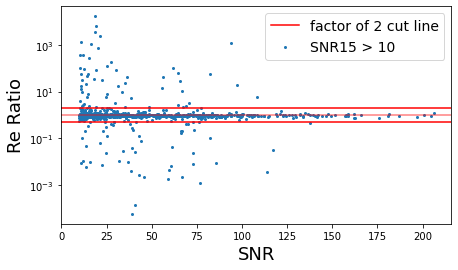

In [370]:
plt.figure(figsize=(7,4))
plt.scatter(snr15,re_ratio,label='SNR15 > 10',s=4)
plt.axhline(1,color='red',alpha=0.5)
plt.axhline(2,color='red')
plt.axhline(0.5,color='red',label='factor of 2 cut line')
plt.yscale('log')
plt.xlabel('SNR',fontsize=18)
plt.ylabel('Re Ratio',fontsize=18)
plt.legend(fontsize=14)

In [371]:
#find number of galaxies above cut, below cut, and within cut
print('number of galaxies above: ',len(np.where(re_ratio>2)[0]))
print('number of galaxies below: ',len(np.where(re_ratio<0.5)[0]))
print('number of galaxies within: ',len(np.where((re_ratio<2)&(re_ratio>0.5))[0]))

number of galaxies above:  61
number of galaxies below:  52
number of galaxies within:  901


In [481]:
#separate according to bins of 25 SNR
above_flag = (re_ratio>2)
below_flag = (re_ratio<0.5)
between_flag = (re_ratio<2)&(re_ratio>0.5)
snr_above = snr15[above_flag]
snr_below = snr15[below_flag]
snr_between = snr15[between_flag]


abovecounter10to40=0
abovecounter40to70=0
abovecounter70to120=0
belowcounter10to40=0
belowcounter40to70=0
belowcounter70to120=0

total10to40=0
flag_10to40 = (snr15>10)&(snr15<40) 
total40to70=0
flag_40to70 = (snr15>40)&(snr15<70) 
total70to120=0
flag_70to120 = (snr15>70)&(snr15<120)

for i in range(0,len(snr_above)):
    if (snr_above[i]>10)&(snr_above[i]<40):
        abovecounter10to40+=1
    if (snr_above[i]>40)&(snr_above[i]<70):
        abovecounter40to70+=1
    if (snr_above[i]>70)&(snr_above[i]<120):
        abovecounter70to120+=1

for i in range(0,len(snr_below)):
    if (snr_below[i]>10)&(snr_below[i]<40):
        belowcounter10to40+=1
    if (snr_below[i]>40)&(snr_below[i]<70):
        belowcounter40to70+=1
    if (snr_below[i]>70)&(snr_below[i]<120):
        belowcounter70to120+=1
        

    
print('# galaxies above with 10<SNR<40: ',abovecounter10to40)
print('# galaxies above with 40<SNR<70: ',abovecounter40to70)
print('# galaxies above with 70<SNR<120: ',abovecounter70to120)
print (' ')
print('# galaxies below with 10<SNR<40: ',belowcounter10to40)
print('# galaxies below with 40<SNR<70: ',belowcounter40to70)
print('# galaxies below with 70<SNR<120: ',belowcounter70to120)
print(' ')
print('# galaxies 10<SNR<40: ',len(snr15[flag_10to40]))
print('# galaxies 40<SNR<70: ',len(snr15[flag_40to70]))
print('# galaxies 70<SNR<120: ',len(snr15[flag_70to120]))
print(' ')
print('Fraction of galaxies above or below with 10<SNR<40: ','%.3f'%((abovecounter10to40+belowcounter10to40)/len(snr15[flag_10to40])))
print('Fraction of galaxies above or below with 40<SNR<70: ','%.3f'%((abovecounter40to70+belowcounter40to70)/len(snr15[flag_40to70])))
print('Fraction of galaxies above or below with 70<SNR<120: ','%.3f'%((abovecounter70to120+belowcounter70to120)/len(snr15[flag_70to120])))




# galaxies above with 10<SNR<40:  45
# galaxies above with 40<SNR<70:  10
# galaxies above with 70<SNR<120:  6
 
# galaxies below with 10<SNR<40:  26
# galaxies below with 40<SNR<70:  15
# galaxies below with 70<SNR<120:  10
 
# galaxies 10<SNR<40:  640
# galaxies 40<SNR<70:  188
# galaxies 70<SNR<120:  134
 
Fraction of galaxies above or below with 10<SNR<40:  0.111
Fraction of galaxies above or below with 40<SNR<70:  0.133
Fraction of galaxies above or below with 70<SNR<120:  0.119


In [385]:
## finding significant outliers
print('number of galaxies:',len(np.where((re_ratio>100)|(re_ratio<0.01))[0]))
indices = np.where((re_ratio>100)|(re_ratio<0.01))[0]
for i in indices:
    print('snr:',snr15[i],' ', ' ', 'prefix:',snr_table['prefix'][i])

number of galaxies: 33
snr: 10.7     prefix: VFID0147-UGC04739
snr: 61.8     prefix: VFID0650-UGC06732
snr: 10.5     prefix: VFID0796-MRK1450
snr: 21.6     prefix: VFID0852-MRK0889
snr: 27.4     prefix: VFID1024-UGCA410
snr: 72.7     prefix: VFID1082-NGC4194
snr: 22.6     prefix: VFID1122-SBS1307+542
snr: 13.5     prefix: VFID1320-CGCG269-056
snr: 10.1     prefix: VFID1424-SBS1445+491
snr: 41.0     prefix: VFID1550-NGC5377
snr: 12.1     prefix: VFID1630-CGCG246-005
snr: 94.0     prefix: VFID1680-B31702+457
snr: 113.7     prefix: VFID1915-NGC5900
snr: 85.4     prefix: VFID1935-NGC2798
snr: 18.6     prefix: VFID2348-MRK0465
snr: 25.4     prefix: VFID2737-NGC4656
snr: 45.8     prefix: VFID3040-NGC3245
snr: 42.8     prefix: VFID3262-UGC06593
snr: 38.8     prefix: VFID3613-2MFGC14475
snr: 11.1     prefix: VFID3905-MRK0886
snr: 37.0     prefix: VFID4106-UGC06653
snr: 15.8     prefix: VFID4842-IC3063
snr: 19.0     prefix: VFID5151-WISEAJ094419.43+095904.7
snr: 38.9     prefix: VFID5192-NGC477

----

In [305]:
print('number of galaxies where Re_err larger than Re*0.2:', 
      len(np.where(free['re_err'] > free['re']*.2)[0]))

number of galaxies where Re_err larger than Re*0.2: 132


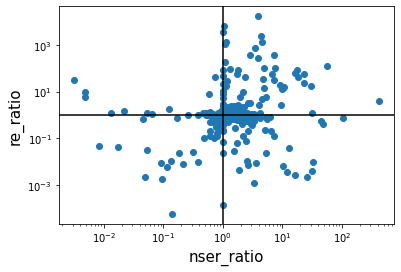

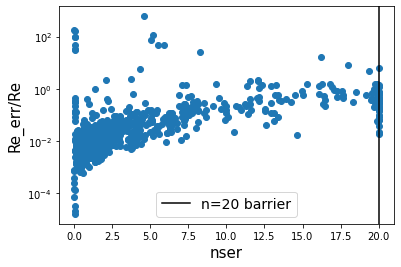

In [450]:
#generate nser_ratio v. re_ratio to establish whether high nser correlates 
#with high re_err

#(redefining re_ratio to re-introduce external galaxies)
re_ratio = fixed['re']/free['re']
nser_ratio = fixed['nsersic']/free['nsersic']

plt.figure()
plt.scatter(nser_ratio,re_ratio)
plt.yscale('log')
plt.xscale('log')
plt.axhline(1,color='black')
plt.axvline(1,color='black')
plt.xlabel('nser_ratio',fontsize=15)
plt.ylabel('re_ratio',fontsize=15)

plt.figure()
plt.scatter(free['nsersic'],free['re_err']/free['re'])
plt.yscale('log')
plt.xlabel('nser',fontsize=15)
plt.ylabel('Re_err/Re',fontsize=15)
plt.axvline(20,color='black',label='n=20 barrier')
plt.legend(fontsize=14)

In [428]:
#it appears nsersic is marginally wonkier when PA, BA are held fixed, according to the below printed text.
#Re fractional error appears to grow as nser grows, but too much scatter to be sure.
#at least according to my interpretation, there is no definitive trend in first plot..?

print('# galaxies in "free" with nser>15:',len(free['nsersic'][(free['nsersic'] >15)]))
print('# galaxies in "fixed" with nser>15:',len(fixed['nsersic'][fixed['nsersic'] > 15]))

# galaxies in "free" with nser>15: 75
# galaxies in "fixed" with nser>15: 110


-----

In [406]:
#lastly...

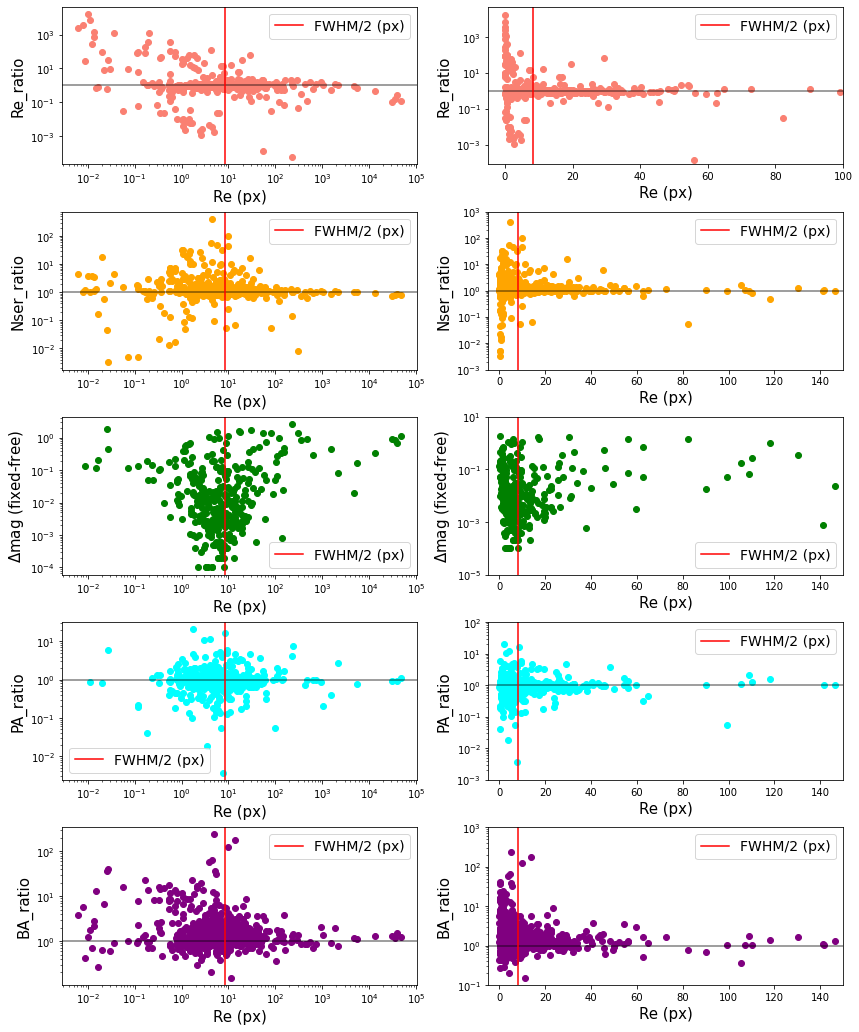

In [467]:
#WISE instrument resolution (FWHM) is 6 arcsec
#Number of arcsec per pixel is 2.75

#FWHM/2 line will be at (3*2.75) = 8.25 px

mag_ratio = fixed['mag']-free['mag']
pa_ratio = fixed['PA']/free['PA']
ba_ratio = fixed['BA']/free['BA']


fig=plt.figure(figsize=(14,18))
plt.subplots_adjust(hspace=.3,wspace=.2)
for i in range(1,11):
    ax=fig.add_subplot(5,2,i)
    if i == 1:
        plt.scatter(free['re'],re_ratio,color='salmon')
        plt.yscale('log')
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.xlabel('Re (px)',fontsize=15)
        plt.ylabel('Re_ratio',fontsize=15)
        plt.xscale('log')
        plt.legend(fontsize=14)
    if i == 2:    
        plt.scatter(free['re'],re_ratio,color='salmon')
        plt.xlim(-5,100)
        plt.ylim(8e-5,5e4)
        plt.yscale('log')
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.xlabel('Re (px)',fontsize=15)
        plt.ylabel('Re_ratio',fontsize=15)
        plt.legend(fontsize=14)
    if i == 3:
        plt.scatter(free['re'],nser_ratio,color='orange')
        plt.yscale('log')
        plt.xlabel('Re (px)',fontsize=15)
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.xscale('log')
        plt.ylabel('Nser_ratio',fontsize=15)
        plt.legend(fontsize=14)
    if i == 4:
        plt.scatter(free['re'],nser_ratio,color='orange')
        plt.xlim(-5,150)
        plt.ylim(1e-3,1e3)
        plt.xlabel('Re (px)',fontsize=15)
        plt.yscale('log')
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.ylabel('Nser_ratio',fontsize=15)
        plt.legend(fontsize=14)
    if i == 5:
        plt.scatter(free['re'],mag_ratio,color='green')
        plt.xlabel('Re (px)',fontsize=15)
        plt.yscale('log')
        plt.axhline(0,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.xscale('log')
        plt.ylabel(r'$\Delta$mag (fixed-free)',fontsize=15)
        plt.legend(fontsize=14)
    if i == 6:
        plt.scatter(free['re'],mag_ratio,color='green')
        plt.xlim(-5,150)
        plt.ylim(1e-5,10)
        plt.yscale('log')
        plt.xlabel('Re (px)',fontsize=15)
        plt.axhline(0,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.ylabel(r'$\Delta$mag (fixed-free)',fontsize=15)
        plt.legend(fontsize=14)
    if i == 7:
        plt.scatter(free['re'],pa_ratio,color='cyan')
        plt.xlabel('Re (px)',fontsize=15)
        plt.yscale('log')
        plt.ylabel('PA_ratio',fontsize=15)
        plt.xscale('log')
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.legend(fontsize=14)
    if i == 8:
        plt.scatter(free['re'],pa_ratio,color='cyan')
        plt.xlim(-5,150)
        plt.ylim(1e-3,100)
        plt.yscale('log')
        plt.xlabel('Re (px)',fontsize=15)
        plt.ylabel('PA_ratio',fontsize=15)
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.legend(fontsize=14)
    if i == 9:
        plt.scatter(free['re'],ba_ratio,color='purple')
        plt.yscale('log')
        plt.xlabel('Re (px)',fontsize=15)
        plt.ylabel('BA_ratio',fontsize=15)
        plt.xscale('log')
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.legend(fontsize=14)
    if i == 10:
        plt.scatter(free['re'],ba_ratio,color='purple')
        plt.xlim(-5,150)
        plt.ylim(.10,1e3)
        plt.yscale('log')
        plt.xlabel('Re (px)',fontsize=15)
        plt.ylabel('BA_ratio',fontsize=15)
        plt.axhline(1,color='black',alpha=0.5)
        plt.axvline(8.25,color='red',label='FWHM/2 (px)')
        plt.legend(fontsize=14)

In [ ]:
#a bulk of the subsample galaxies, for EACH parameter ratio vs. Re plot,  lie to the left of the FWHM/2 line.
#That is, GALFIT is outputting parameters with large discrepancies (fixed vs. free), with most scatter being
#concentrated where Re outputs (free) are less than the WISE resolution (FWHM/2).

#I am not too sure how to interpret this finding, aside from there being fewer local minima wells at
#higher radii? 

In [461]:
#LASTLY, lastly --> determine number of galaxies with radius<8.25 (from sga_cut['radius'])
#Never mind. There is only one. Only one.
#Unfortunately, no v1 catalogs contain any columns with unwise radii...